In [1]:
from model import MLP
from data_generator import DataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
mlp = MLP(input_shape=(28, 28, 1),
          nb_classes=10)
data_generator = DataGenerator(batch_size=64,
                               is_training=True,
                               flatten=False)

In [3]:
mlp.fit(data_generator, nb_epoch=3, model_dir='./model')


epoch 1 / 3
937/938  loss : 0.0233  acc : 1.0000
epoch 2 / 3
937/938  loss : 0.0315  acc : 1.0000
epoch 3 / 3
937/938  loss : 0.0474  acc : 0.9688
Training is done ... 


In [4]:
test_generator = DataGenerator(batch_size=64,
                              is_training=False,
                              flatten=False)

In [5]:
mlp.evaluate_generator(test_generator)

0.98709999999999998

In [6]:
tf.gradients(mlp.logit, mlp.input_)

[<tf.Tensor 'gradients_1/conv2d/convolution_grad/Conv2DBackpropInput:0' shape=(?, 28, 28, 1) dtype=float32>]

In [7]:
x, y = next(test_generator())

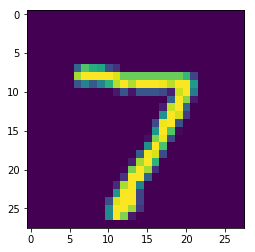

In [8]:
plt.imshow(x[0].reshape(28, 28))

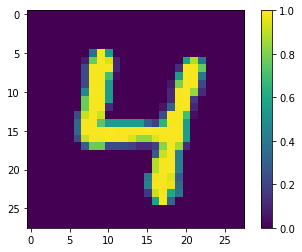

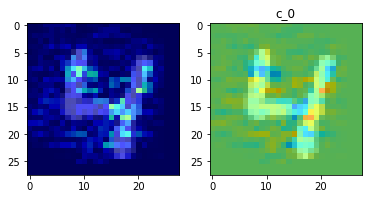

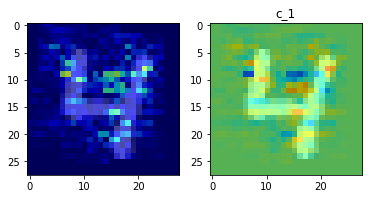

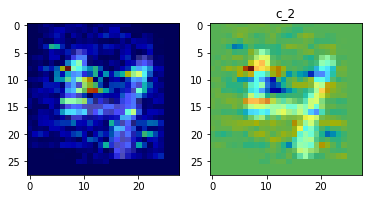

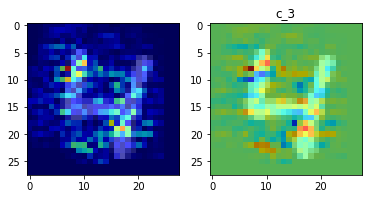

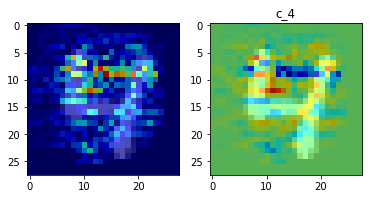

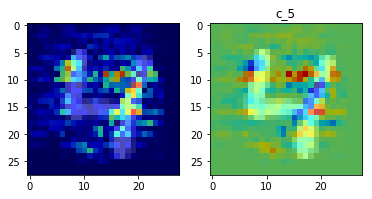

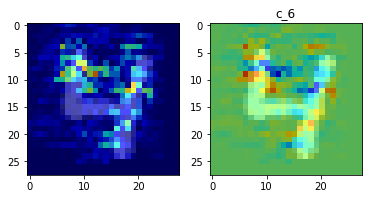

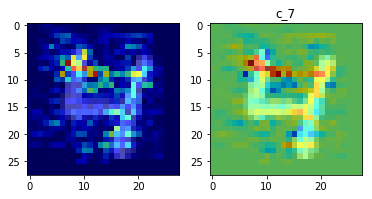

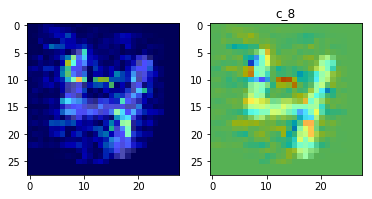

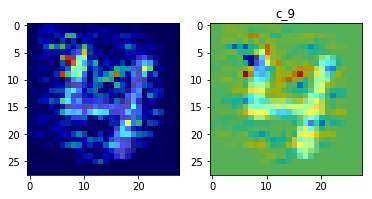

In [15]:
# sampling one digit
_x = x[56]
_x = np.expand_dims(_x, 0)
plt.figure()
plt.imshow(_x[0].reshape(28, 28))
plt.colorbar()

# calc gradients for each output unit
for i in range(10):
    grad = tf.gradients(mlp.logit[:, i], mlp.input_)[0]
    grads = mlp.sess.run(grad, 
                         feed_dict={mlp.input_: x})
    plt.figure()
    plt.subplot(121)
    plt.imshow(_x[0].reshape(28, 28), cmap='gray')
    plt.imshow(np.abs(grads[0].reshape(28, 28)), cmap='jet', alpha=0.7, vmin=0., vmax=1.)
    plt.subplot(122)
    plt.imshow(_x[0].reshape(28, 28), cmap='gray')
    plt.imshow(grads[0].reshape(28, 28), cmap='jet', alpha=0.7, vmin=-1., vmax=1.)
    plt.title('c_{}'.format(i))